# Importing and analysing the dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("static/dataset/Fertilizer Prediction.csv")
data.head()

Temparature  Humidity   Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0           26         52        38     Sandy      Maize        37          0   
1           29         52        45     Loamy  Sugarcane        12          0   
2           34         65        62     Black     Cotton         7          9   
3           32         62        34       Red    Tobacco        22          0   
4           28         54        46    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  
0            0            Urea  
1           36             DAP  
2           30        14-35-14  
3           20           28-28  
4            0            Urea

In [3]:
data.describe()

Temparature    Humidity      Moisture     Nitrogen    Potassium  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean     30.282828    59.151515    43.181818    18.909091     3.383838   
std       3.486171     5.813429    11.219649    11.546262     5.787883   
min      25.000000    50.000000    25.000000     4.000000     0.000000   
25%      28.000000    54.000000    34.000000    10.000000     0.000000   
50%      30.000000    60.000000    41.000000    13.000000     0.000000   
75%      33.000000    64.000000    51.000000    24.000000     8.000000   
max      38.000000    72.000000    65.000000    42.000000    19.000000   

       Phosphorous  
count  1089.000000  
mean     18.606061  
std      13.414901  
min       0.000000  
25%       9.000000  
50%      19.000000  
75%      30.000000  
max      42.000000

In [4]:
data.shape

(1089, 9)

In [5]:
data.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

<Axes: xlabel='Fertilizer Name', ylabel='count'>

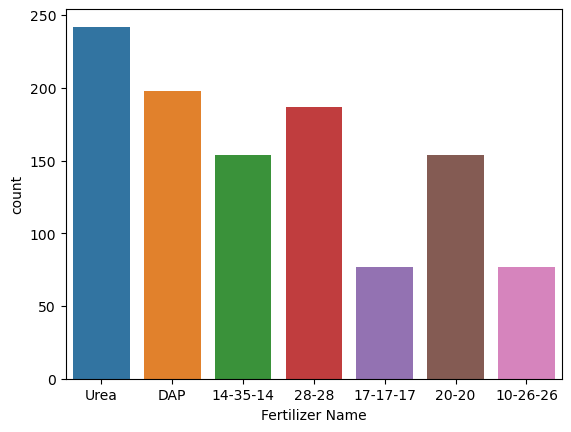

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=data,x='Fertilizer Name')

In [7]:
data['Soil Type'].value_counts()

Loamy     231
Sandy     220
Clayey    220
Black     209
Red       209
Name: Soil Type, dtype: int64

In [8]:
data['Crop Type'].value_counts()

Sugarcane      143
Cotton         132
Millets        121
Paddy          110
Pulses         110
Wheat           99
Tobacco         77
Barley          77
Oil seeds       77
Ground Nuts     77
Maize           66
Name: Crop Type, dtype: int64

In [9]:
soil_dict={
    'Loamy':1,
    'Sandy':2,
    'Clayey':3,
    'Black':4,
    'Red':5
}

crop_dict={
    'Sugarcane':1,
    'Cotton':2,
    'Millets':3,
    'Paddy':4,
    'Pulses':5,
    'Wheat':6,
    'Tobacco':7,
    'Barley':8,
    'Oil seeds':9,
    'Ground Nuts':10,
    'Maize':11
    
}

In [10]:
data['Soil_Num']=data['Soil Type'].map(soil_dict)
data['Crop_Num']=data['Crop Type'].map(crop_dict)

In [11]:
data=data.drop(['Soil Type','Crop Type'],axis=1)
data.head()

Temparature  Humidity   Moisture  Nitrogen  Potassium  Phosphorous  \
0           26         52        38        37          0            0   
1           29         52        45        12          0           36   
2           34         65        62         7          9           30   
3           32         62        34        22          0           20   
4           28         54        46        35          0            0   

  Fertilizer Name  Soil_Num  Crop_Num  
0            Urea         2        11  
1             DAP         1         1  
2        14-35-14         4         2  
3           28-28         5         7  
4            Urea         3         4

In [12]:
X=data.drop(['Fertilizer Name'],axis=1)
Y=data['Fertilizer Name']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [14]:
X_train.shape

(871, 8)

In [15]:
X_test.shape

(218, 8)

# Importing the models for prediction


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

for name,md in models.items():
    md.fit(X_train,Y_train)
    ypred=md.predict(X_test)
    
    print(f"the Accuracy of {name} is ",accuracy_score(Y_test,ypred))

C:\Users\91871\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the Accuracy of Logistic Regression is  1.0
the Accuracy of Naive Bayes is  1.0
the Accuracy of Support Vector Machine is  0.9724770642201835
the Accuracy of K-Nearest Neighbors is  1.0
the Accuracy of Decision Tree is  1.0
the Accuracy of Random Forest is  1.0
the Accuracy of Bagging is  1.0
the Accuracy of AdaBoost is  0.6467889908256881
the Accuracy of Gradient Boosting is  1.0
the Accuracy of Extra Trees is  1.0


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

for name,md in models.items():
    md.fit(X_train,Y_train)
    ypred=md.predict(X_test)
    
    print(f"the Accuracy of {name} is ",accuracy_score(Y_test,ypred))

the Accuracy of Logistic Regression is  1.0
the Accuracy of Decision Tree is  1.0
the Accuracy of Random Forest is  1.0


C:\Users\91871\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Using decision tree

In [19]:
classifier=DecisionTreeClassifier()
classifier.fit(X_train,Y_train)
ypred=classifier.predict(X_test)
accuracy_score(Y_test,ypred)

1.0

In [20]:
def recommendation(Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil_Num,Crop_Num):
    features = np.array([[Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil_Num,Crop_Num]])
    prediction = classifier.predict(features).reshape(1,-1)
    
    return prediction[0]

In [21]:
Temparature=2
Humidity=59
Moisture=3
Nitrogen=12
Potassium=0
Phosphorous=3
Soil_Num=2
Crop_Num=11
predict=recommendation(Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil_Num,Crop_Num)
predict[0]

C:\Users\91871\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'20-20'

In [21]:
Temparature=int(input("Enter the Temperature of crop area: "))
Humidity=int(input("Enter the Humidity of crop area: "))
Moisture=int(input("Enter the Moisture of crop area: "))
Nitrogen=int(input("Enter the Nitrogen quantity of crop area: "))
Potassium=int(input("Enter the Potassium quantity of crop area: "))
Phosphorous=int(input("Enter the Phosphoroys quantity of crop area: "))
Soil_Num=int(input("Enter the number of times teh soil been used for croping: "))
Crop_Num=int(input("Enter the number of crops taken in the land: "))
predict=recommendation(Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil_Num,Crop_Num)
print("The fertilizer that can be used in the crop feild: ",predict[0])

Enter the Temperature of crop area: 43
Enter the Humidity of crop area: 24
Enter the Moisture of crop area: 43
Enter the Nitrogen quantity of crop area: 23
Enter the Potassium quantity of crop area: 33
Enter the Phosphoroys quantity of crop area: 12
Enter the number of times teh soil been used for croping: 2
Enter the number of crops taken in the land: 3
The fertilizer that can be used in the crop feild:  28-28


C:\Users\91871\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
